## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [35]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [36]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are 294478 rows in the dataset

c. The number of unique users in the dataset.

In [38]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [39]:
#since converted is measured as a 1 or 0, I can just sum up the converted col to get the number of user converted
df.converted.sum()/df.user_id.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [40]:
df.query('group=="treatment" & landing_page=="old_page" or group=="control" & landing_page=="new_page"').user_id.count()

3893

f. Do any of the rows have missing values?

In [41]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No rows have missing values!

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [91]:
#create a new DF that only contains those rows in which the treatement group received the new page, and the control group received the old page
df2 = df[((df.group=='treatment')&(df.landing_page == 'new_page'))|((df.group=='control')&(df['landing_page'] == 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [92]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [93]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [94]:
df2[df2.user_id.duplicated(keep=False)].user_id.unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [95]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [96]:
df2.drop_duplicates(['user_id'], inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [97]:
users = df2.user_id.count()
conv = df2.converted.sum()
print(conv/users)

0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [98]:
cont = df2.query('group == "control"').user_id.count()
c_conv = df2.query('group == "control"').converted.sum()
print(c_conv/cont)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [99]:
treat = df2.query('group == "treatment"').user_id.count()
t_conv = df2.query('group == "treatment"').converted.sum()
print(t_conv/treat)

0.118808065515


d. What is the probability that an individual received the new page?

In [100]:
print(treat/users)

0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The conversion rate of the control group is 12.04%, which is greater than the overall conversion rate of 11.96% and the treatment conversion rate of 11.89%. This suggests that the old page leads to slightly more conversions. However, given that there is only a .15% difference in the conversion rates between the control and treatment groups, I would question whether 
difference is signficant or not.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: $p_{new}$ - $p_{old}$ <= 0

$H_{1}$: $p_{new}$ - $p_{old}$ > 0

$\alpha$ = .05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [52]:
#because it's regardless of page, it's just the reg overall conversion rate
p_new = df2.converted.sum() / df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [53]:
#same for the old page, it's the reg overall conversion rate
p_old = df2.converted.sum() / df2.user_id.nunique()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [54]:
n_new = df2.query('group == "treatment" & landing_page=="new_page"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [55]:
n_old = df2.query('group == "control" & landing_page=="old_page"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [56]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [57]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old,1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [59]:
p_new = new_page_converted.sum()/len(new_page_converted)
p_old = old_page_converted.sum()/len(old_page_converted)
p_new - p_old

-0.00087191733552294259

This result falls under the null hypothesis, since $p_{new}$ - $p_{old}$ <= 0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [65]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new,1-p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old,1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [66]:
#calculating the observed difference in ab_data.csv cleaned data to use as a comparison to the simulated values
conv_new = df2.query('landing_page=="new_page"').converted.sum() / df2.query('landing_page=="new_page"').user_id.nunique()
conv_old = df2.query('landing_page=="old_page"').converted.sum() / df2.query('landing_page=="new_page"').user_id.nunique()

obs_diff = conv_new - conv_old
obs_diff

-0.001548413736150292

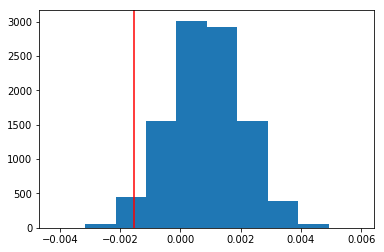

In [67]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red');

The simulated difference values have a slightly different distribution than the observed difference from the ab_data - they are more positive - but is it a significant difference?

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [68]:
#converted the p_diffs to an array
p_diffs = np.array(p_diffs)

In [69]:
#counting the number of differences greater than the obs_diff
count = 0
for i in p_diffs:
    if i > obs_diff:
        count=count+1
        
p_diffs_greater = count/len(p_diffs)
p_diffs_greater

0.9768

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value calculated in part J is the simulated P-Value based on the 10000 simulations we run. Because the P-Value, .9768, is greater than our alpha, .05, we fail to reject the null hypothesis - the difference in probability that a user converts using the new page versus the old page is not statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [72]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page"').converted.sum()
convert_new = df2.query('landing_page=="new_page"').converted.sum()
n_old = df2.query('landing_page=="old_page"').user_id.nunique()
n_new = df2.query('landing_page=="new_page"').user_id.nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score)
print(p_value)

-1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value from the z-test is .905, as we do a one-sided test (since we are testing if the new page results in more conversions, we use the alternate 'larger' as a parameter). This p value is similar to that calculated in parts j and k, .9768. Both are greater than our alpha of .05 and therefore we again fail to reject the null hypothesis.

A z-score is defined as the number of standard deviations a data point is away from the mean. A z-score of less than 0 indicates that observed values is less than the mean. The data here suggests that the new page actually results in less conversions than the new page - however, the z-score of -1.31 is not less than the left bound of the distribution of -1.96 standard deviations (based on the .05 alpha), so therefore we again fail to reject the null hypothesis.

Sources:
http://www.statisticshowto.com/probability-and-statistics/z-score/
http://stattrek.com/statistics/dictionary.aspx?definition=z-score
https://www.investopedia.com/terms/z/z-test.asp

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I should perform a logistic regression, since 1 measurement is a numeric variable (converted or not) and there is 1 nominal variable (type of page received).

source: http://www.biostathandbook.com/simplelogistic.html

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [101]:
#remove warnings from output
import warnings
warnings.filterwarnings("ignore")

In [102]:
#create col for intercept
df3 = df2
df3['intercept']=1
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [103]:
#create dummy variable
#1 for treatment
#0 for control

df3[['control','treatment']] = pd.get_dummies(df3['group'])
df3.rename(columns={'treatment':'ab_page'}, inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [104]:
#drop 1 of the dummy variable cols
df3 = df3.drop('control', axis=1)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [105]:
#import regression model
import statsmodels.api as sm

In [106]:
#instantiate and fit model
logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:46:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p value of the regression is .19, compared the the z-test p value of .905 and the simluted p value of .9768. This is because the regression simply tests if the new page results in a *different* number of conversions (ie a two-tailed test), and not specifically *more* conversions(ie a one-tailed test).
The hypotheses for the regression are as follows:<br>
$H_{0}$: $p_{new}$ - $p_{old}$ = 0<br>
$H_{1}$: $p_{new}$ - $p_{old}$ != 0<br>
$\alpha$ = .05<br>

Compared to the hypotheses for the z-test:<br>
$H_{0}$: $p_{new}$ - $p_{old}$ <= 0<br>
$H_{1}$: $p_{new}$ - $p_{old}$ > 0<br>
$\alpha$ = .05<br>

In the z-test, the parameter alternative='larger' was added to test specifically is the new page resulted in more conversions than the old.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to explore other factors that may be influencing the data to determine the most powerful influence, or what aspects may be making your results unclear. For example, if the time of day the new page is tested on a user is not varied, the results could be skewed.

However, the more influences you add the more convoluted your results are, since they are shown in relation to one another "all else being held equal". There is also a risk of multicolinearity - where factors have strong relationships with each other and it can affect the calculations of the independent variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [108]:
#read and view countries.csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [109]:
#see what countries are there in order to create dummy variables
countries.groupby(['country']).count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [110]:
#create dummy variables and drop 1
countries[['UK','CA','US']] = pd.get_dummies(countries['country'])
countries.drop(['US', 'country'], axis=1, inplace=True)
countries.head()

,user_id,UK,CA
0,834778,0,1
1,928468,0,0
2,822059,0,1
3,711597,0,1
4,710616,0,1


In [111]:
#merge datasets into 1 on user_id
df4 = pd.merge(countries, df3, on='user_id', how='inner')
df4.head()

,user_id,UK,CA,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,0,1,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,0,1,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [112]:
#instantiate and fit regression
logit_countries = sm.Logit(df4['converted'], df4[['intercept','UK','CA']])
results = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        18:46:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
CA             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

It does not appear that the country had a signifcant effect on conversion rates, as both the UK and CA p values, .129 and .456 respectively, are greater than our alpha of .05.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [114]:
#instantiate and fit regression
logit_countries = sm.Logit(df4['converted'], df4[['intercept','ab_page','UK','CA']])
results = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [115]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        18:46:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
CA             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Including both the ab_page and country values for the regression increased all the p values by .001, making them even less significant. This is a result of collinearity, where have multiple variables that are even somewhat related can muddy the results of other variables.

<a id='conclusions'></a>
## Conclusions

>Despite the fact that the observed conversion rate for those who received the old page, 12.04%, is slightly higher than the conversion rate for the new page, 11.89%, there is no statistical difference between them. Both the p-values from the ztest and the logistic regression were greater than our alpha of .05, and therefore we fail to reject the null hypothesis of $H_{0}$: $p_{new}$ - $p_{old}$ <= 0.

>Additionally, there is no statistical difference in conversion rates based on the country the user is in, as again both the p-values from the ztest and the logistic regression were greater than our alpha of .05, and therefore we fail to reject the null hypothesis of $H_{0}$: $p_{new}$ - $p_{old}$ <= 0.

>I would recommend that the company keep their old page because the new one does not make a significant difference in conversions. It is also interesting to note that while the results may be not be significant, because the z-score was very negative , -1.31, the the new page leans towards being slightly worse for the conversion rate than the old page.

In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0